In [5]:
from __future__ import absolute_import,division,print_function,unicode_literals

from datetime import datetime
import seaborn as sns
import os
import numpy as np
import pandas as pd
import matplotlib as mpl
from matplotlib import pyplot as plt

mpl.rcParams['figure.figsize'] = (10,8)


In [6]:
def parse(x):
  return datetime.strptime(x, '%m/%d/%Y')

In [9]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/youtubeLI/master/dataset/electricity_consumption.csv',parse_dates = ['Bill_Date'],date_parser=parse)
df.head()

,Bill_Date,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
0,2016-01-01,365,1423.5,219.0,247.73,31
1,2016-02-01,292,1138.8,175.2,234.11,31
2,2016-03-01,130,507.0,78.0,123.85,29
3,2016-04-01,117,456.3,70.2,111.22,29
4,2016-05-01,136,530.4,81.6,118.37,29


In [8]:
print("Rows : ",df.shape[0])
print("Columns : ",df.shape[1])
print("\nFeatures : \n",df.columns.tolist())
print("\nMissing values : \n",df.isnull().any())
print("\nUnique values : \n",df.nunique())

Rows :  53
Columns :  6

Features : 
 ['Bill_Date', 'On_peak', 'Off_peak', 'Usage_charge', 'Billed_amount', 'Billing_days']

Missing values : 
 Bill_Date        False
On_peak          False
Off_peak         False
Usage_charge     False
Billed_amount    False
Billing_days     False
dtype: bool

Unique values : 
 Bill_Date        53
On_peak          51
Off_peak         53
Usage_charge     53
Billed_amount    52
Billing_days      9
dtype: int64


In [10]:
bill_df = df.set_index('Bill_Date')

In [11]:
bill_df.head()

,On_peak,Off_peak,Usage_charge,Billed_amount,Billing_days
Bill_Date,,,,,
2016-01-01,365,1423.5,219.0,247.73,31
2016-02-01,292,1138.8,175.2,234.11,31
2016-03-01,130,507.0,78.0,123.85,29
2016-04-01,117,456.3,70.2,111.22,29
2016-05-01,136,530.4,81.6,118.37,29


In [12]:
bill_2018 = bill_df['2016':'2018'][['Billed_amount']]

In [14]:
bill_2018.head()

,Billed_amount
Bill_Date,
2016-01-01,247.73
2016-02-01,234.11
2016-03-01,123.85
2016-04-01,111.22
2016-05-01,118.37


Simple moving average = (t + (t-1) + (t-2) + (t-3) + ... + (t-n))/2



In [16]:
bill_2018[['Billed_amount']].rolling(window = 3).mean()

,Billed_amount
Bill_Date,
2016-01-01,NaN
2016-02-01,NaN
2016-03-01,201.896667
2016-04-01,156.393333
2016-05-01,117.813333
2016-06-01,102.466667
2016-07-01,94.283333
2016-08-01,95.626667
2016-09-01,144.230000


In [20]:
bill_2018['MA_rolling_3'] = bill_2018['Billed_amount'].rolling(window = 3).mean().shift(1)

In [21]:
bill_2018

,Billed_amount,MA_rolling_3
Bill_Date,,
2016-01-01,247.73,NaN
2016-02-01,234.11,NaN
2016-03-01,123.85,NaN
2016-04-01,111.22,201.896667
2016-05-01,118.37,156.393333
2016-06-01,77.81,117.813333
2016-07-01,86.67,102.466667
2016-08-01,122.40,94.283333
2016-09-01,223.62,95.626667


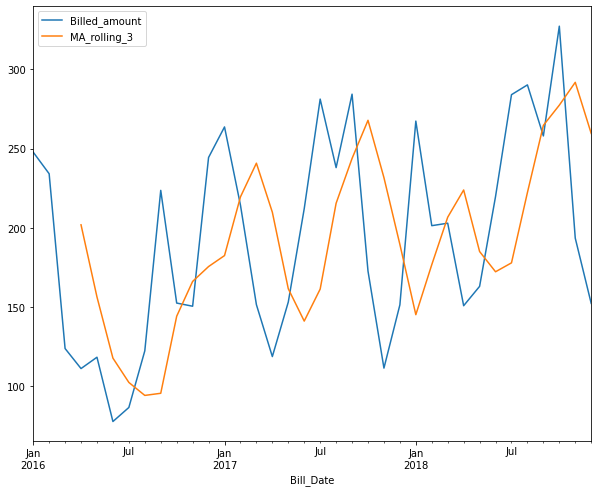

In [23]:
bill_2018.plot()

Simple moving average = (t * weightfactor) + ((t-1)* weightfactor-1) + ((t-2)* weightfactor-2) + ... + ((t-n)* weightfactor-n))/n

In [26]:
def wma(weights):
  def calc(x):
    return (weights*x).mean()
  return calc


In [31]:
bill_2018['Billed_amount'].rolling(window=3).apply(wma(np.array([0.5,1.0,1.5])))

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    181.250000
2016-04-01    135.911667
2016-05-01    116.900000
2016-06-01     96.898333
2016-07-01     89.000000
2016-08-01    103.058333
2016-09-01    167.055000
2016-10-01    171.210000
2016-11-01    163.386667
2016-12-01    197.788333
2017-01-01    238.366667
2017-02-01    235.768333
2017-03-01    191.150000
2017-04-01    145.628333
2017-05-01    141.443333
2017-06-01    176.898333
2017-07-01    236.818333
2017-08-01    248.061667
2017-09-01    268.338333
2017-10-01    220.773333
2017-11-01    160.701667
2017-12-01    141.661667
2018-01-01    202.718333
2018-02-01    215.018333
2018-03-01    213.125000
2018-04-01    176.625000
2018-05-01    165.640000
2018-06-01    189.380000
2018-07-01    242.421667
2018-08-01    276.361667
2018-09-01    273.026667
2018-10-01    297.940000
2018-11-01    248.801667
2018-12-01    195.198333
Name: Billed_amount, dtype: float64

In [32]:
bill_2018['WMA_rolling_3'] = bill_2018['Billed_amount'].rolling(window = 3).apply(wma(np.array([0.5,1.0,1.5]))).shift(1)

In [33]:
bill_2018

,Billed_amount,MA_rolling_3,WMA_rolling_3
Bill_Date,,,
2016-01-01,247.73,NaN,NaN
2016-02-01,234.11,NaN,NaN
2016-03-01,123.85,NaN,NaN
2016-04-01,111.22,201.896667,181.250000
2016-05-01,118.37,156.393333,135.911667
2016-06-01,77.81,117.813333,116.900000
2016-07-01,86.67,102.466667,96.898333
2016-08-01,122.40,94.283333,89.000000
2016-09-01,223.62,95.626667,103.058333


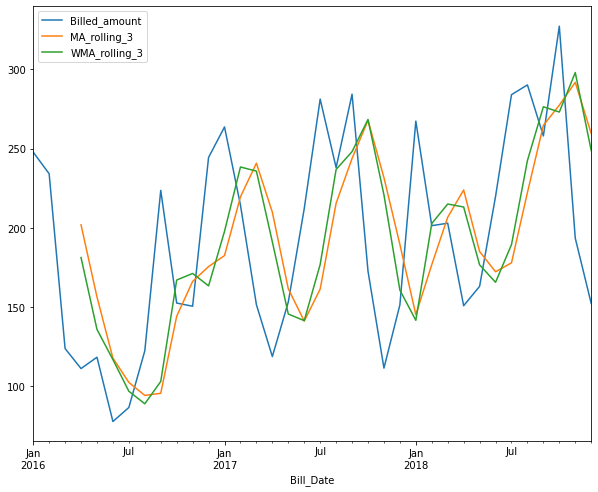

In [34]:
bill_2018.plot()

exponential moving average = (close - previous EMA) * (2/(span+1)) + previous EMA

In [35]:
bill_2018['Billed_amount'].ewm(span=3,adjust=False, min_periods=0).mean()

Bill_Date
2016-01-01    247.730000
2016-02-01    240.920000
2016-03-01    182.385000
2016-04-01    146.802500
2016-05-01    132.586250
2016-06-01    105.198125
2016-07-01     95.934063
2016-08-01    109.167031
2016-09-01    166.393516
2016-10-01    159.466758
2016-11-01    155.003379
2016-12-01    199.686689
2017-01-01    231.663345
2017-02-01    222.991672
2017-03-01    187.265836
2017-04-01    153.027918
2017-05-01    153.103959
2017-06-01    182.591980
2017-07-01    231.890990
2017-08-01    234.930495
2017-09-01    259.615247
2017-10-01    216.152624
2017-11-01    163.831312
2017-12-01    157.625656
2018-01-01    212.472828
2018-02-01    206.911414
2018-03-01    204.910707
2018-04-01    177.885353
2018-05-01    170.477677
2018-06-01    195.118838
2018-07-01    239.549419
2018-08-01    264.849710
2018-09-01    261.404855
2018-10-01    294.297427
2018-11-01    243.893714
2018-12-01    198.116857
Name: Billed_amount, dtype: float64

In [39]:
bill_2018['EWM_Billed_amount'] = bill_2018['Billed_amount'].ewm(span=3,adjust=False, min_periods=0).mean().shift(1)

In [40]:
bill_2018.head()

,Billed_amount,MA_rolling_3,WMA_rolling_3,EWM_Billed_amount
Bill_Date,,,,
2016-01-01,247.73,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.7300
2016-03-01,123.85,NaN,NaN,240.9200
2016-04-01,111.22,201.896667,181.250000,182.3850
2016-05-01,118.37,156.393333,135.911667,146.8025


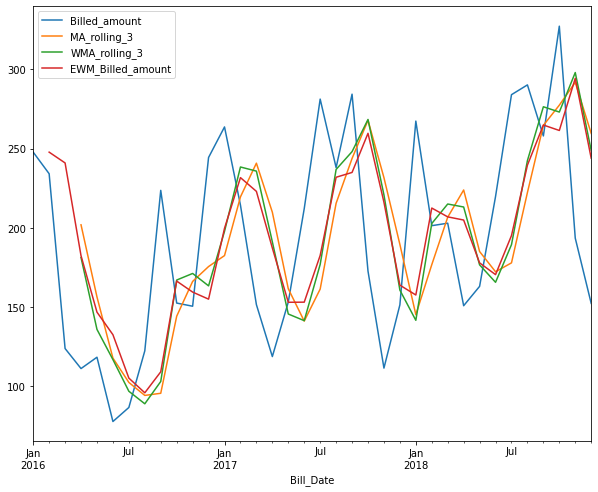

In [41]:
bill_2018.plot()

Exponential smoothing

 Y_t+1 = alpha( Y_t + (1 - alpha) * Y_t-1  +  (1 - alpha)^2 * Y_t-2 + .... +  (1-alpha)^n * Y_t-n )

In [42]:
bill_2018['Billed_amount'].ewm(alpha=0.7,adjust=False, min_periods=3).mean()

Bill_Date
2016-01-01           NaN
2016-02-01           NaN
2016-03-01    158.153800
2016-04-01    125.300140
2016-05-01    120.449042
2016-06-01     90.601713
2016-07-01     87.849514
2016-08-01    112.034854
2016-09-01    190.144456
2016-10-01    163.821337
2016-11-01    154.524401
2016-12-01    217.416320
2017-01-01    249.772896
2017-02-01    224.955869
2017-03-01    173.564761
2017-04-01    135.222428
2017-05-01    147.792728
2017-06-01    192.793819
2017-07-01    254.671146
2017-08-01    242.980344
2017-09-01    271.904103
2017-10-01    202.454231
2017-11-01    138.793269
2017-12-01    147.631981
2018-01-01    231.413594
2018-02-01    210.369078
2018-03-01    205.147723
2018-04-01    167.146317
2018-05-01    164.292895
2018-06-01    203.119869
2018-07-01    259.721961
2018-08-01    281.021588
2018-09-01    264.878476
2018-10-01    308.496543
2018-11-01    227.991963
2018-12-01    175.035589
Name: Billed_amount, dtype: float64

In [46]:
bill_2018['ESM__0.7_Billed_amount'] = bill_2018['Billed_amount'].ewm(alpha=0.7,adjust=False, min_periods=3).mean().shift(1)

In [56]:
bill_2018.head()

,Billed_amount,MA_rolling_3,WMA_rolling_3,EWM_Billed_amount,ESM__0.7_Billed_amount
Bill_Date,,,,,
2016-01-01,247.73,NaN,NaN,NaN,NaN
2016-02-01,234.11,NaN,NaN,247.7300,NaN
2016-03-01,123.85,NaN,NaN,240.9200,NaN
2016-04-01,111.22,201.896667,181.250000,182.3850,158.15380
2016-05-01,118.37,156.393333,135.911667,146.8025,125.30014


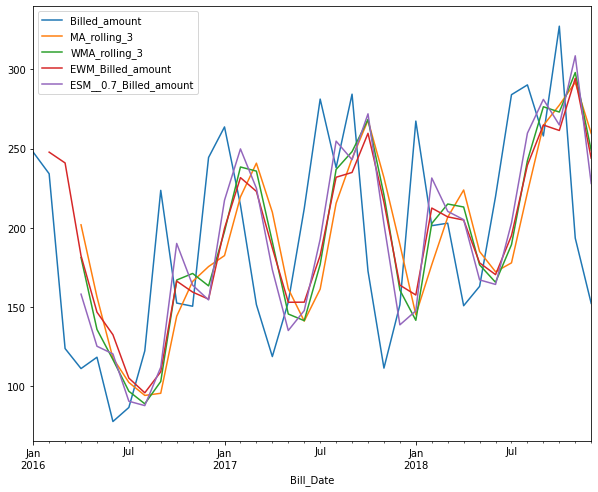

In [57]:
bill_2018.plot()

In [58]:
bill_2018['ESM__0.3_Billed_amount'] = bill_2018['Billed_amount'].ewm(alpha=0.3,adjust=False, min_periods=3).mean().shift(1)

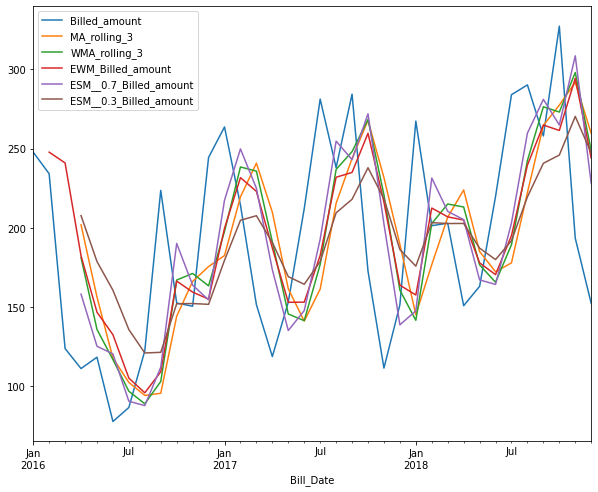

In [59]:
bill_2018.plot()

Calculate RMSE between each column and raw data to find which is best.